# Truncation error analysis

In [1]:
import numpy as np 
import src.animation

def analyseError(
    scheme,
    config,
    generateIC,
    analyticalSolution,
    N=5,
    increaseSpatialResolution = 2, 
    increaseTemporalResolution = 1, 
    debug=False,
    waveScheme = None, 
    advection = False,
    potential = None,
):
    NX    = config["resolution"]
    L     = config["domainSize"]
    tEnd  = config["tEnd"]
    dx    = L / NX
    dt    = config["dt"]
    error = np.zeros(N)

    resolutions = []
    average_timesteps = []

    for i in range(N):
        config["resolution"] = NX
        solver = scheme(config, generateIC)
        #solver.setExternalPotentialFunction(potential)
        if waveScheme is not None:
            waveSolver = waveScheme(config, generateIC)
            #waveSolver.setExternalPotentialFunction(potential)
        else:
            waveSolver = None 

        dx = solver.dx 
        nt = 0
        timesteps = [0]
        solver.run()
        if waveSolver is not None:
            waveSolver.run()

        if waveScheme is None:
            if advection:
                ana, _  = analyticalSolution(*solver.grid, solver.dx, solver.t)
            else:
                ana = np.abs(analyticalSolution(*solver.grid, solver.dx, solver.t)) ** 2
        else:
            ana = np.abs(waveSolver.getPsi())**2

        num = solver.getDensity()

        error[i] = np.mean(np.abs(num - ana))
        resolutions.append(dx)
        average_timesteps.append(np.mean(timesteps))

        if debug:
            print("dx ", dx, " dt ", np.mean(timesteps))
            print("error [i]: ", i, error[i])
            animation.drawFrame(solver, waveSolver = waveSolver, advection=advection)
            plt.show()

        NX *= increaseSpatialResolution
        NX = int(NX)
        dt /= increaseTemporalResolution
            
    return error, resolutions, average_timesteps

# Analyse accuracy of advection schemes

In [18]:
from IPython.display import display, Markdown, Latex 

%run src/advection_test_suite.py

In [20]:
test_list = ["gaussian", "tophat"]
schemes = ["upwind", "sou with limiter", "ppm"]
error_lists = []
for t in test_list: 
    error_list = []
    for s in schemes: 
        config = getBaseConfig()
        e, _, _ = analyseError(
            algorithms[s],
            config,
            tests[t],
            tests[t],
            N=5,
            increaseSpatialResolution = 2, 
            increaseTemporalResolution = 1, 
            debug=False,
            waveScheme = None, 
            advection = True,
            potential = None,
        )
        error_list.append(e)

    error_lists.append(error_list)

Finished in 57 time steps
Finished in 114 time steps
Finished in 228 time steps
Finished in 456 time steps
Finished in 911 time steps
Finished in 113 time steps
Finished in 226 time steps
Finished in 451 time steps
Finished in 902 time steps
Finished in 1803 time steps
Finished in 57 time steps
Finished in 114 time steps
Finished in 228 time steps
Finished in 456 time steps
Finished in 911 time steps
Finished in 57 time steps
Finished in 114 time steps
Finished in 228 time steps
Finished in 456 time steps
Finished in 911 time steps
Finished in 113 time steps
Finished in 226 time steps
Finished in 451 time steps


/home/calab912/Documents/fdm-hybrid-scheme/src/schemes.py:22: RuntimeWarning: overflow encountered in square
  VANALBADA   = lambda r: (r**2 + r)/(1+r**2)
/home/calab912/Documents/fdm-hybrid-scheme/src/schemes.py:22: RuntimeWarning: invalid value encountered in divide
  VANALBADA   = lambda r: (r**2 + r)/(1+r**2)


Finished in 902 time steps
Finished in 1803 time steps
Finished in 57 time steps
Finished in 114 time steps
Finished in 228 time steps
Finished in 456 time steps
Finished in 911 time steps


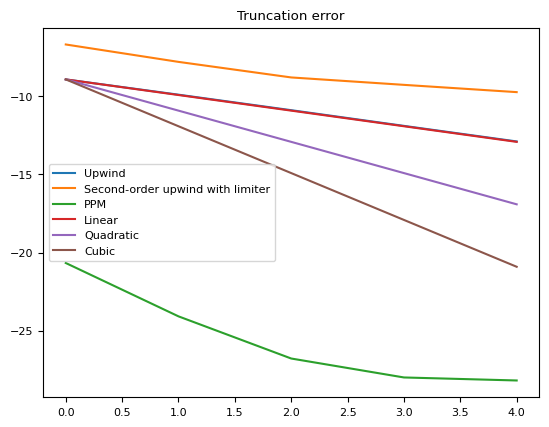

In [15]:
for j, t in enumerate(test_list): 
    e0 = error_lists[j][0][0]
    xx = np.arange(len(error_lists[j][0]))
    plt.title("Truncation error ")
    for i, label in enumerate(schemes): 
        plt.plot(xx, error_lists[j][i] , label=label)
    plt.plot(xx, np.log(e1[0] * 1/2**(xx)  ) / np.log(2), label="Linear")
    plt.plot(xx, np.log(e1[0] * 1/2**(2*xx)) / np.log(2), label="Quadratic")
    plt.plot(xx, np.log(e1[0] * 1/2**(3*xx)) / np.log(2), label="Cubic")
    plt.legend()
    plt.show()

# Analyse accuracy of Schroedinger-schemes

In [1]:
from IPython.display import display, Markdown, Latex 

%run sps_test_suite.py

# Test: harmonic oscillator coherent state

Constructing muscl-upwind scheme scheme
Setting up fourier grid
Finished in 2686 time steps
dx  0.21875  dt  0.0
error [i]:  0 1.3322265862104166


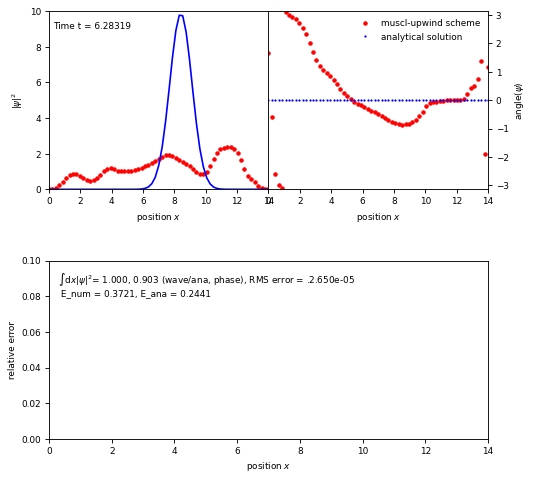

Constructing muscl-upwind scheme scheme
Setting up fourier grid
Finished in 3385 time steps
dx  0.2  dt  0.0
error [i]:  1 1.3310863358002327


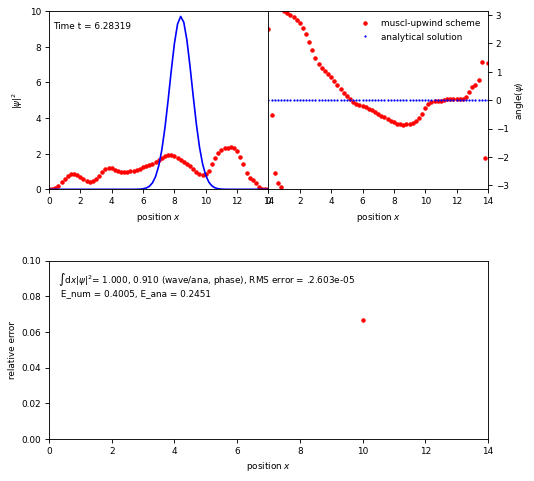

Constructing muscl-upwind scheme scheme
Setting up fourier grid
Finished in 4067 time steps
dx  0.18181818181818182  dt  0.0
error [i]:  2 1.3265067782578621


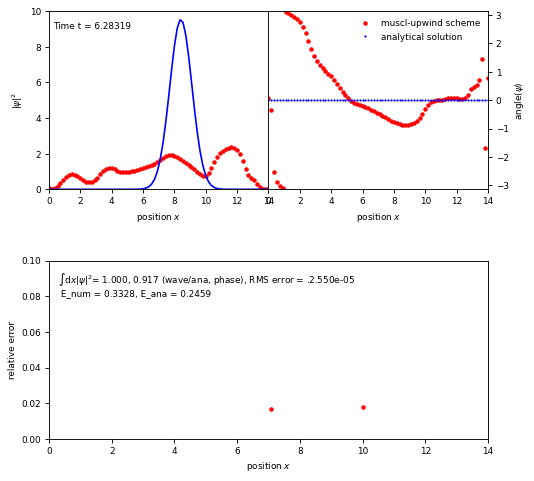

Constructing muscl-upwind scheme scheme
Setting up fourier grid
Finished in 4737 time steps
dx  0.16666666666666666  dt  0.0
error [i]:  3 1.3280927456892662


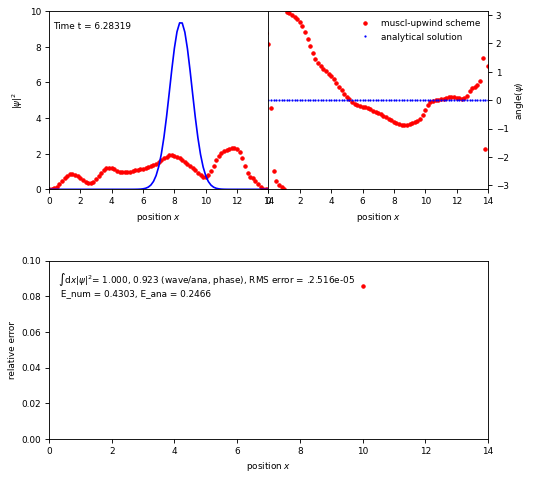

Constructing muscl-upwind scheme scheme
Setting up fourier grid
Finished in 5592 time steps
dx  0.15217391304347827  dt  0.0
error [i]:  4 1.3250870733877123


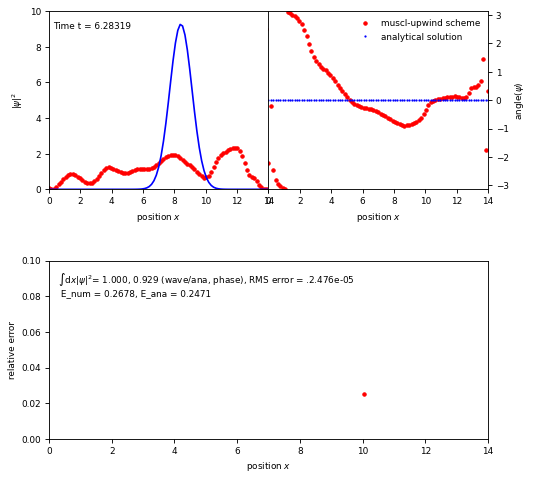

Constructing muscl-upwind scheme scheme
Setting up fourier grid
Finished in 6623 time steps
dx  0.13861386138613863  dt  0.0
error [i]:  5 1.3262684212669034


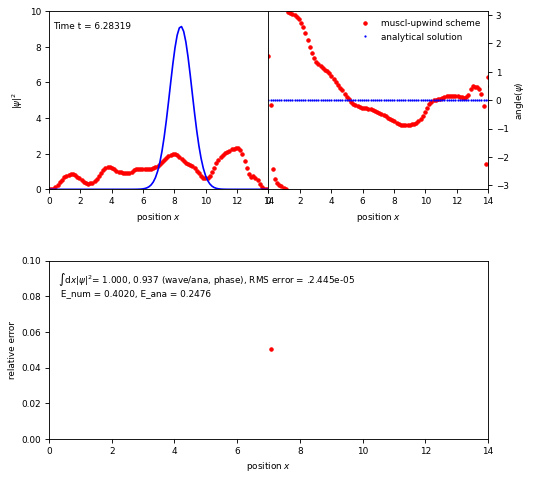

data/truncation_error_harmonic_oscillator_coherent_state_phase-ho-upwind_mc.npz


In [10]:
N = 6
#test_names_1d  = ['accuracy test']
test_names  = ["harmonic oscillator coherent state"]
#test_names  = ['periodic gaussian wave packet']
#test_names  = ['perturbation wave 2D', 'perturbation wave 3D']
#test_names = ['periodic gaussian wave packet']#, 'accuracy test 3D']
schemes_for_accuracy_test = ["phase-ho-upwind_mc"]#, "phase-ho-upwind_mc"]#, "phase-ho-upwind_leer", "phase-ho-upwind_albada"]
#schemes_for_accuracy_test = ["phase-ho-upwind_albada"]"wave-ftcs2", "wave-ftcs4", 
advection  = False
waveScheme = None#wave_schemes.SpectralScheme

increaseSpatialResolution  = 1.1
increaseTemporalResolution = 1 
suffix = ""
plotRuns = True

for test_name in test_names:
    test, testConfig, potential = test_list[test_name]

    display(Markdown('#' + " Test: " + test_name))

    truncations_errors = {}

    for scheme_name in schemes_for_accuracy_test:
        scheme, schemeConfig = scheme_list[scheme_name]

        c = getBaseConfig()
        testConfig(c)
        schemeConfig(c)
        c["timeOrder"] = 2
        c["stencilOrder"] = 4
        c["C_parabolic"] = 0.1
        c["C_velocity"] = 0.25

        p, dx, dt = analyseError(
            scheme,
            c,
            test,
            test,
            N=N,
            increaseTemporalResolution = increaseTemporalResolution, 
            increaseSpatialResolution = increaseSpatialResolution,
            debug=plotRuns,
            waveScheme= waveScheme,
            advection = advection,
            potential = potential
        )

        truncations_errors[scheme_name] = {
            "errors": p,
            "dx": dx,
            "dt": dt
        }
        filename = "data/truncation_error_" + test_name.replace(" ", "_") + "_" + scheme_name.replace(" ", "_") + suffix + ".npz"
        print(filename)
        np.savez(filename, **(truncations_errors[scheme_name]))

In [13]:
data = np.load("data/truncation_error_periodic_gaussian_wave_packet_phase-ho-upwind.npz")
dx = data["dx"]
len(dx), dx[0]/dx[1]

(4, 1.59375)

In [10]:
data.keys()

KeysView(<numpy.lib.npyio.NpzFile object at 0x7fc406d40a00>)